In [38]:
%matplotlib inline

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

## Merge csv file together to analyse the correlation between Happiness and Internet access rate, Disaster rate, and Sleeping hours.

In [40]:
happydata = pd.read_csv("../Clean Data/Happinessclean.csv").drop("Unnamed: 0",axis =1)
disaster = pd.read_csv("../Clean Data/Disasterrateclean.csv").drop("Unnamed: 0",axis =1)
internet = pd.read_csv("../Clean Data/Internetrateclean.csv").drop("Unnamed: 0",axis =1)
sleeping = pd.read_csv("../Clean Data/Sleepingclean.csv").drop("Unnamed: 0",axis =1)
mergedata1 = pd.merge(happydata,disaster, on = "Country",how ="inner").reset_index(drop = True)
mergedata = pd.merge(mergedata1,internet, on ="Country",how = "inner").reset_index(drop = True)
mergedata["Disaster rate"]=mergedata["Disaster rate"].str.replace('%', '').astype(float)
mergeOECD =pd.merge(mergedata,sleeping, on = "Country",how = "inner").reset_index(drop = True)
mergedata.to_csv("Analysisdata.csv")
mergeOECD.to_csv("AnalysisOECDdata.csv")

## Plot a graph to show the change in happy order in the world among top 10 countries

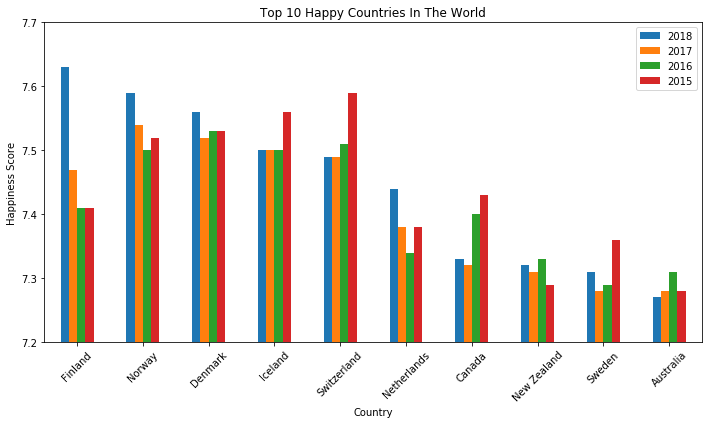

In [41]:
#fig,ax = plt.subplots(figsize = (10,6))
happy = happydata.set_index("Country")
data = happy.iloc[0:10,]
data.plot(kind="bar",figsize =(10,6))
plt.ylabel("Happiness Score")
plt.ylim(7.2,7.7)
plt.title("Top 10 Happy Countries In The World")
plt.xticks(np.arange(0,10),data.index, rotation=45)
plt.tight_layout()
plt.savefig("../ChartsTables/Top10_happycountry.png")
plt.show()

## #Analyse the correlation by using seaborn toolbox

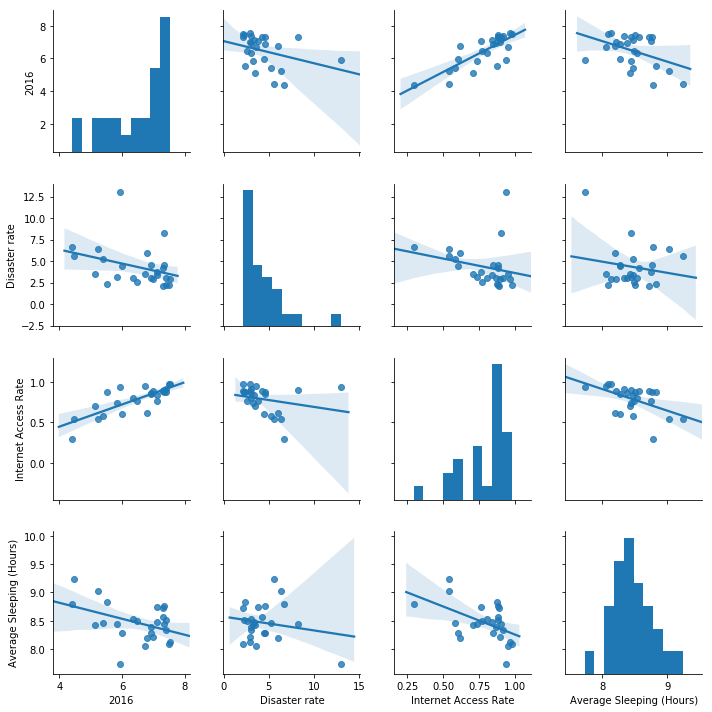

In [54]:
# OCECD Country list concludes around 30 countries only.
analyseOECDdata = mergeOECD[["2016","Disaster rate","Internet Access Rate","Average Sleeping (Hours)"]]
sns.pairplot(analyseOECDdata,kind ="reg")
plt.tight_layout()
plt.savefig("../ChartsTables/sns4factors.png")
plt.show()

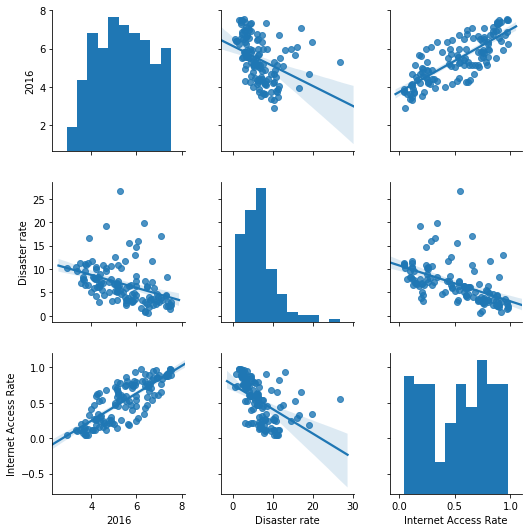

In [55]:
#Analyse the correlation between happiness score and Disaster rate and Internet access rate using higher population around 125
analysedata = mergedata[["2016","Disaster rate","Internet Access Rate"]]
sns.pairplot(analysedata,kind ="reg")
plt.tight_layout()
plt.savefig("../ChartsTables/sns3factors.png")
plt.show()

## Heatmap on correlation

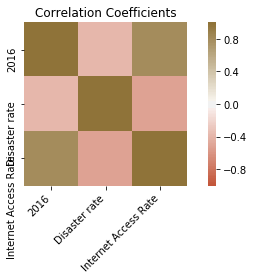

In [56]:
correlation = analysedata.corr()
ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 420, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title("Correlation Coefficients")
plt.tight_layout()
plt.savefig("../ChartsTables/3factorscorrelation.png")
plt.show()

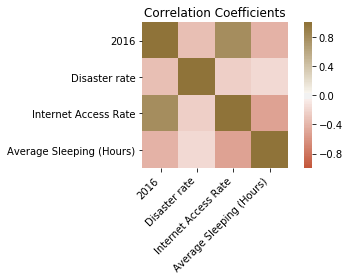

In [57]:
correlationOECD = analyseOECDdata.corr()
ax = sns.heatmap(correlationOECD, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 420, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title("Correlation Coefficients")
plt.tight_layout()
plt.savefig("../ChartsTables/4factorscorrelation.png")
plt.show()